<a href="https://colab.research.google.com/github/23028939/project-2025-priyanka/blob/main/Copy_of_data_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#DATA PREPROCESSING

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
#connecting collab to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#loading data
df = pd.read_csv('/content/drive/MyDrive/PCOS_data.csv')
print(df.head())


   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.3           15                78                22  ...   
1  24.9           15                74                20  ...   
2  25.3           11                72                18  ...   
3  29.7           13                72                20  ...   
4  20.1           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110  

In [5]:
df.shape                 #prints the shape of dataframe

(541, 45)

In [6]:
df.dtypes

,0
Sl. No,int64
Patient File No.,int64
PCOS (Y/N),int64
Age (yrs),int64
Weight (Kg),float64
Height(Cm),float64
BMI,float64
Blood Group,int64
Pulse rate(bpm),int64
RR (breaths/min),int64


In [7]:
df.columns             #prints the columns of

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [8]:
#removing unnecessary columns
df.drop(columns=['Sl. No', 'Patient File No.', 'Blood Group', 'Unnamed: 44'],  inplace=True, errors='ignore')
#print(df.columns)

df.columns = df.columns.str.strip()           #removes leading and trailing whitespaces from column names
df.columns = df.columns.str.replace(' ', '_') #replaces spaces in column names with underscores
df.columns = df.columns.str.upper()           #converts column names to uppercase
df.columns = df.columns.str.replace('-', '_') #replaces hyphens in column names with underscores
df.columns = df.columns.str.replace('.', '', regex=False) #replaces periods in column names with nothing

print(df.columns)


Index(['PCOS_(Y/N)', 'AGE_(YRS)', 'WEIGHT_(KG)', 'HEIGHT(CM)', 'BMI',
       'PULSE_RATE(BPM)', 'RR_(BREATHS/MIN)', 'HB(G/DL)', 'CYCLE(R/I)',
       'CYCLE_LENGTH(DAYS)', 'MARRAIGE_STATUS_(YRS)', 'PREGNANT(Y/N)',
       'NO_OF_ABORTIONS', 'I___BETA_HCG(MIU/ML)', 'II____BETA_HCG(MIU/ML)',
       'FSH(MIU/ML)', 'LH(MIU/ML)', 'FSH/LH', 'HIP(INCH)', 'WAIST(INCH)',
       'WAIST:HIP_RATIO', 'TSH_(MIU/L)', 'AMH(NG/ML)', 'PRL(NG/ML)',
       'VIT_D3_(NG/ML)', 'PRG(NG/ML)', 'RBS(MG/DL)', 'WEIGHT_GAIN(Y/N)',
       'HAIR_GROWTH(Y/N)', 'SKIN_DARKENING_(Y/N)', 'HAIR_LOSS(Y/N)',
       'PIMPLES(Y/N)', 'FAST_FOOD_(Y/N)', 'REGEXERCISE(Y/N)',
       'BP__SYSTOLIC_(MMHG)', 'BP__DIASTOLIC_(MMHG)', 'FOLLICLE_NO_(L)',
       'FOLLICLE_NO_(R)', 'AVG_F_SIZE_(L)_(MM)', 'AVG_F_SIZE_(R)_(MM)',
       'ENDOMETRIUM_(MM)'],
      dtype='object')


In [9]:
df.dtypes

,0
PCOS_(Y/N),int64
AGE_(YRS),int64
WEIGHT_(KG),float64
HEIGHT(CM),float64
BMI,float64
PULSE_RATE(BPM),int64
RR_(BREATHS/MIN),int64
HB(G/DL),float64
CYCLE(R/I),int64
CYCLE_LENGTH(DAYS),int64


In [10]:
#converting object columns to numeric
df['II____BETA_HCG(MIU/ML)'] = pd.to_numeric(df['II____BETA_HCG(MIU/ML)'], errors='coerce')
df['AMH(NG/ML)'] = pd.to_numeric(df['AMH(NG/ML)'], errors='coerce')
df.dtypes

,0
PCOS_(Y/N),int64
AGE_(YRS),int64
WEIGHT_(KG),float64
HEIGHT(CM),float64
BMI,float64
PULSE_RATE(BPM),int64
RR_(BREATHS/MIN),int64
HB(G/DL),float64
CYCLE(R/I),int64
CYCLE_LENGTH(DAYS),int64


In [11]:
df.isnull().sum()    #prints missing values

,0
PCOS_(Y/N),0
AGE_(YRS),0
WEIGHT_(KG),0
HEIGHT(CM),0
BMI,0
PULSE_RATE(BPM),0
RR_(BREATHS/MIN),0
HB(G/DL),0
CYCLE(R/I),0
CYCLE_LENGTH(DAYS),0


In [12]:
#filling missing values using median interpretation
df['MARRAIGE_STATUS_(YRS)'].fillna(df['MARRAIGE_STATUS_(YRS)'].median(), inplace=True)
df['FAST_FOOD_(Y/N)'].fillna(df['FAST_FOOD_(Y/N)'].median(), inplace=True)
df['II____BETA_HCG(MIU/ML)'].fillna(df['II____BETA_HCG(MIU/ML)'].median(), inplace=True)
df['AMH(NG/ML)'].fillna(df['AMH(NG/ML)'].median(), inplace=True)

<ipython-input-12-cce243d5cb05>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MARRAIGE_STATUS_(YRS)'].fillna(df['MARRAIGE_STATUS_(YRS)'].median(), inplace=True)
<ipython-input-12-cce243d5cb05>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [13]:
#EXPLORATORY DATA ANALYSIS

In [14]:
print(df.describe())        #prints summary statistics

       PCOS_(Y/N)   AGE_(YRS)  WEIGHT_(KG)  HEIGHT(CM)         BMI  \
count  541.000000  541.000000   541.000000  541.000000  541.000000   
mean     0.327172   31.430684    59.637153  156.484835   24.307579   
std      0.469615    5.411006    11.028287    6.033545    4.055129   
min      0.000000   20.000000    31.000000  137.000000   12.400000   
25%      0.000000   28.000000    52.000000  152.000000   21.600000   
50%      0.000000   31.000000    59.000000  156.000000   24.200000   
75%      1.000000   35.000000    65.000000  160.000000   26.600000   
max      1.000000   48.000000   108.000000  180.000000   38.900000   

       PULSE_RATE(BPM)  RR_(BREATHS/MIN)    HB(G/DL)  CYCLE(R/I)  \
count       541.000000        541.000000  541.000000  541.000000   
mean         73.247689         19.243993   11.160037    2.560074   
std           4.430285          1.688629    0.866904    0.901950   
min          13.000000         16.000000    8.500000    2.000000   
25%          72.000000       

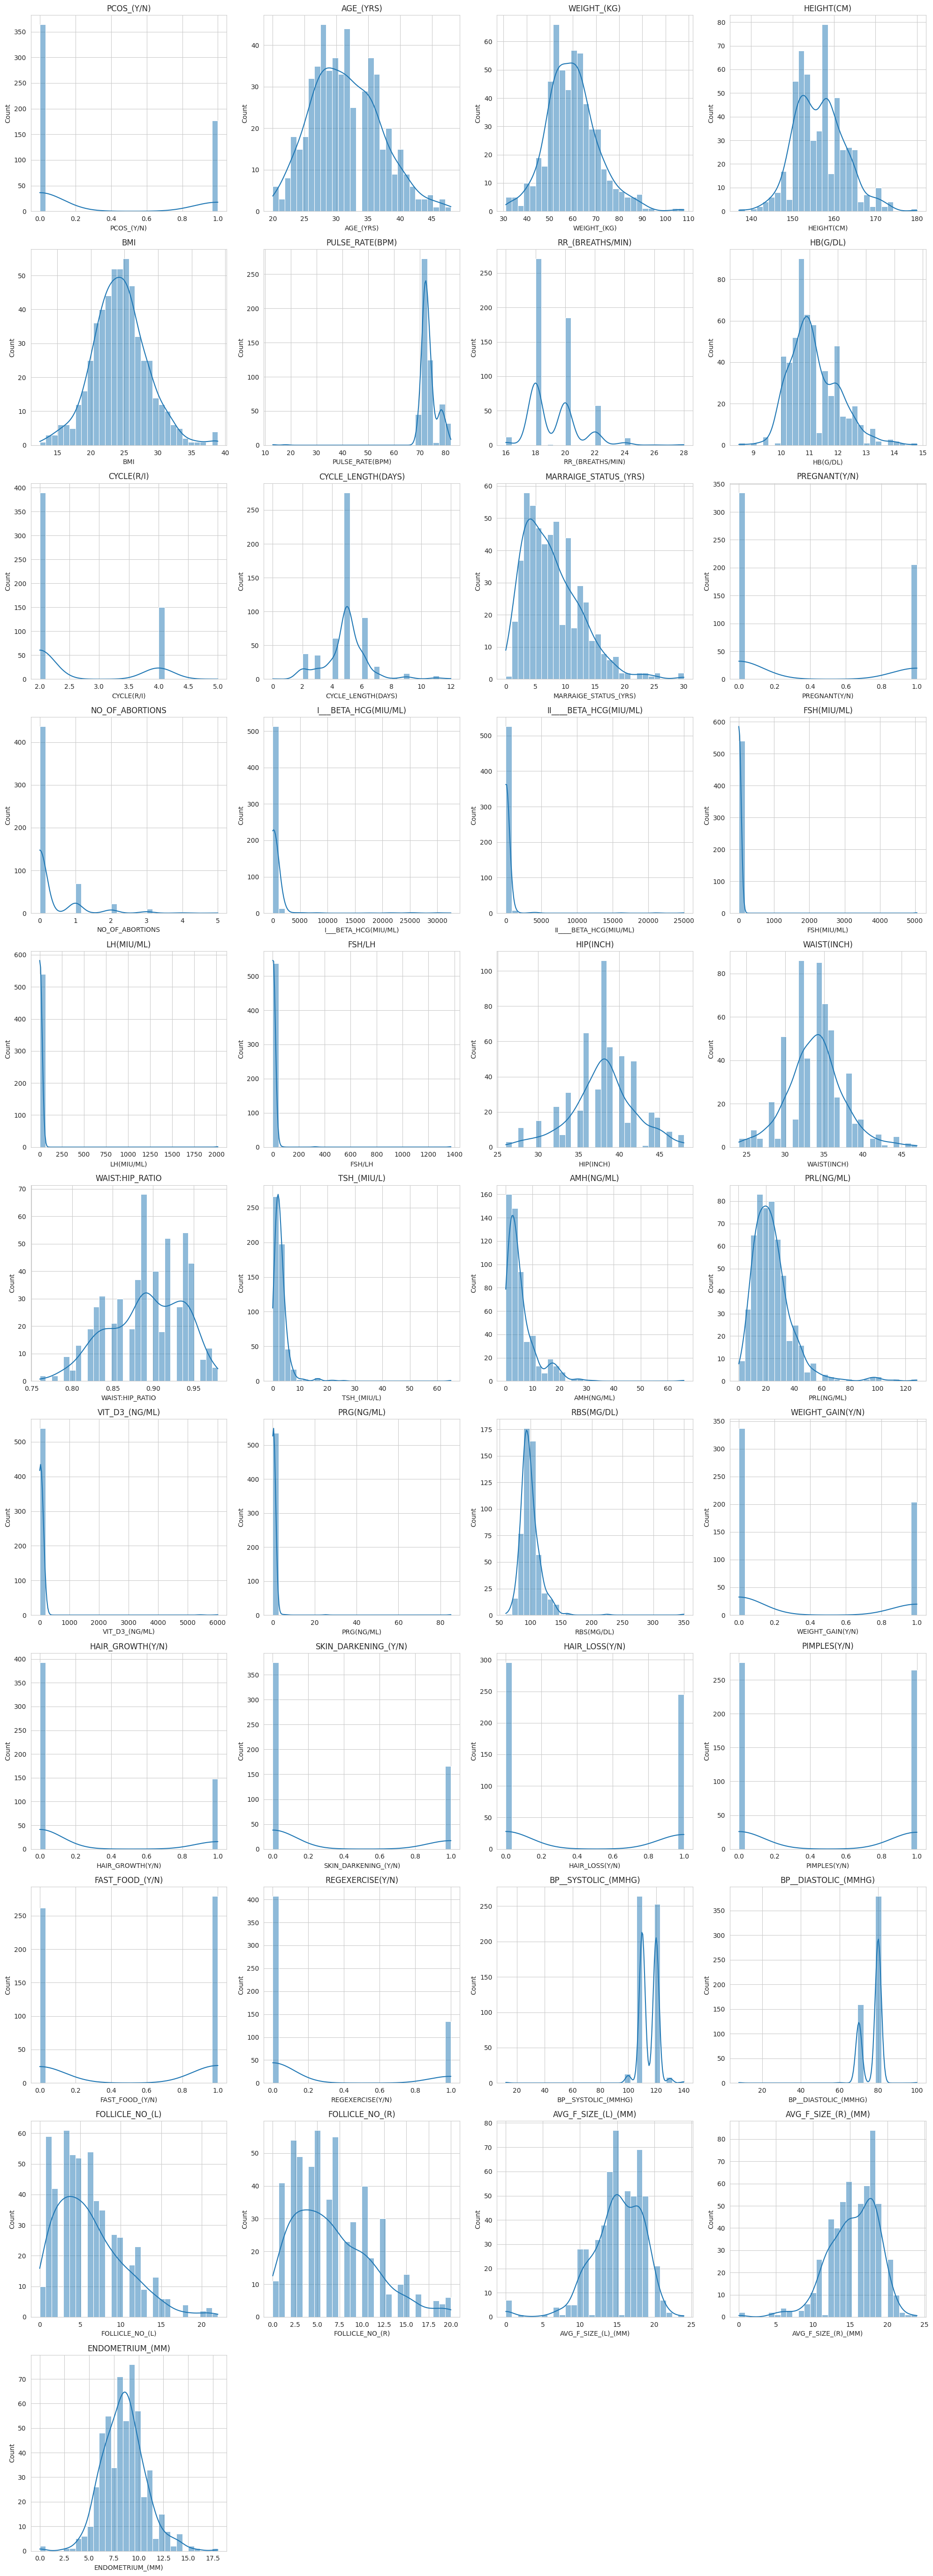

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Calculate the number of rows and columns for the subplot grid
num_cols = 4  # Number of columns in the grid
num_rows = int(np.ceil(len(df.columns) / num_cols))  # Calculate rows based on columns

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each column to create individual histograms
for i, col in enumerate(df.columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])  # Plot on the corresponding subplot
    axes[i].set_title(col)  # Set title to current column name

# Hide any empty subplots if the number of columns doesn't divide evenly
for i in range(len(df.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

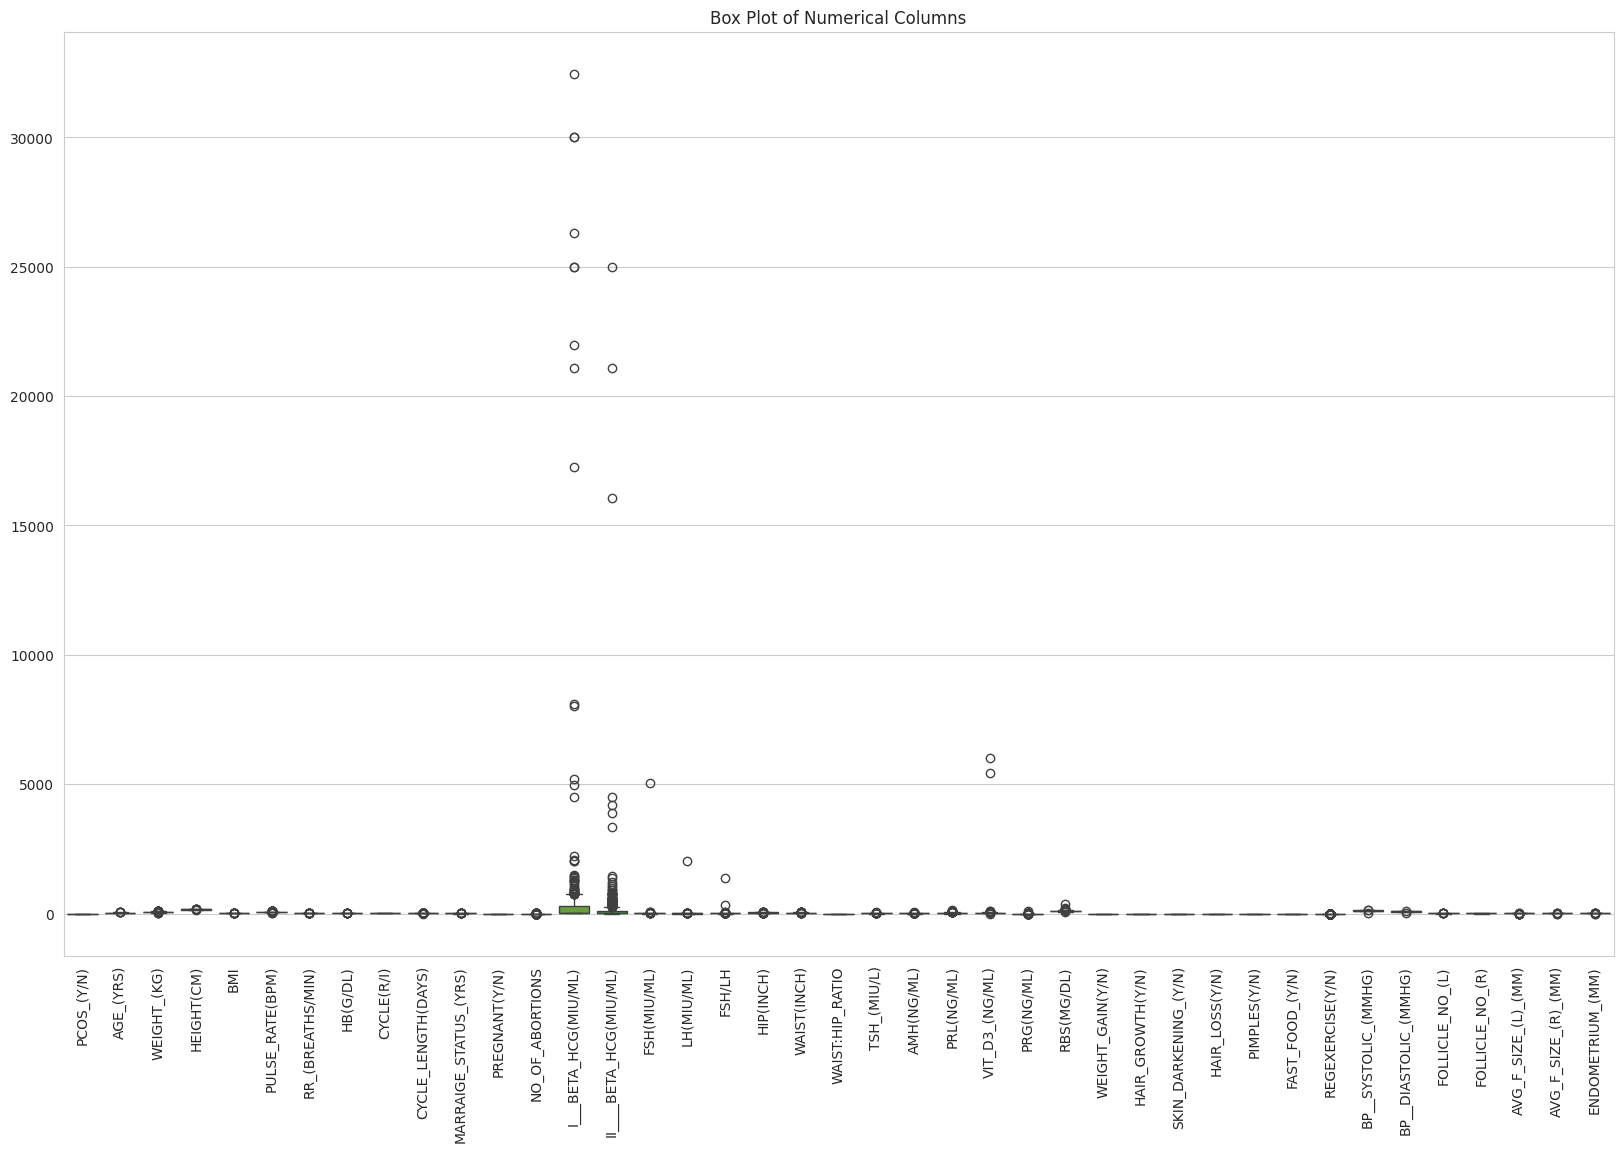

In [16]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=df)
plt.xticks(rotation=90)             # Rotate x-axis labels for readability
plt.title('Box Plot of Numerical Columns')
plt.show()

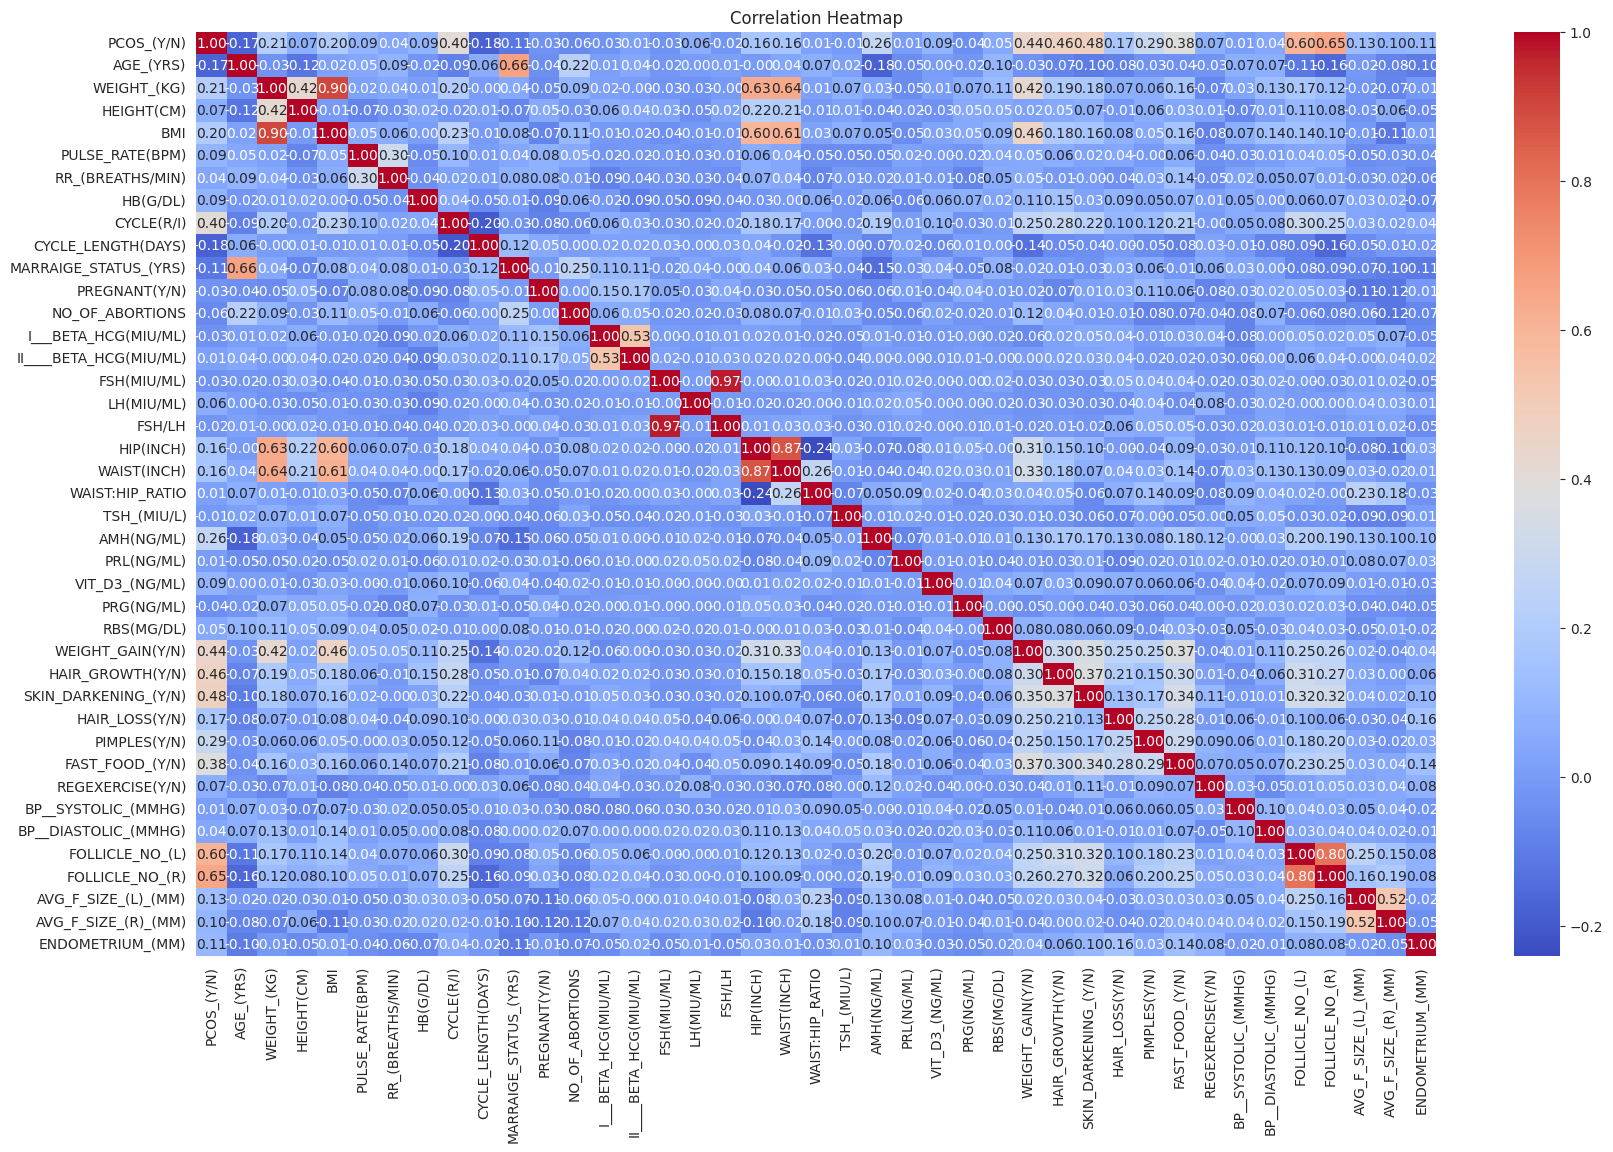

In [17]:
# Calculate correlation matrix for all numerical columns
correlation_matrix = df.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap')
plt.show()

In [18]:
df.head()

,PCOS_(Y/N),AGE_(YRS),WEIGHT_(KG),HEIGHT(CM),BMI,PULSE_RATE(BPM),RR_(BREATHS/MIN),HB(G/DL),CYCLE(R/I),CYCLE_LENGTH(DAYS),...,PIMPLES(Y/N),FAST_FOOD_(Y/N),REGEXERCISE(Y/N),BP__SYSTOLIC_(MMHG),BP__DIASTOLIC_(MMHG),FOLLICLE_NO_(L),FOLLICLE_NO_(R),AVG_F_SIZE_(L)_(MM),AVG_F_SIZE_(R)_(MM),ENDOMETRIUM_(MM)
0,0,28,44.6,152.0,19.3,78,22,10.48,2,5,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,74,20,11.70,2,5,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,72,18,11.80,2,5,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,72,20,12.00,2,5,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,72,18,10.00,2,5,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [19]:
# feature selection and target definition
x=df.drop(columns=['PCOS_(Y/N)'])
y=df['PCOS_(Y/N)']

In [20]:
# splitting data into tran and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [21]:
x_train

,AGE_(YRS),WEIGHT_(KG),HEIGHT(CM),BMI,PULSE_RATE(BPM),RR_(BREATHS/MIN),HB(G/DL),CYCLE(R/I),CYCLE_LENGTH(DAYS),MARRAIGE_STATUS_(YRS),...,PIMPLES(Y/N),FAST_FOOD_(Y/N),REGEXERCISE(Y/N),BP__SYSTOLIC_(MMHG),BP__DIASTOLIC_(MMHG),FOLLICLE_NO_(L),FOLLICLE_NO_(R),AVG_F_SIZE_(L)_(MM),AVG_F_SIZE_(R)_(MM),ENDOMETRIUM_(MM)
244,39,104.0,164.40,38.5,72,18,12.0,2,6,11.0,...,1,1.0,0,120,80,9,7,16.0,13.0,9.6
540,23,82.0,165.00,30.1,80,20,10.2,4,7,2.0,...,1,1.0,0,120,70,9,10,19.0,18.0,6.9
417,32,71.8,162.00,27.4,72,18,10.8,2,6,4.0,...,1,0.0,1,120,80,3,3,14.0,13.0,9.0
509,46,54.0,152.00,23.4,74,20,14.0,2,4,16.0,...,0,1.0,0,120,70,20,18,18.0,17.0,7.8
353,30,55.0,164.00,20.4,74,22,10.2,2,6,7.0,...,1,1.0,0,110,80,6,4,13.0,15.0,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,29,61.0,151.00,26.8,74,20,10.0,2,5,9.0,...,0,0.0,0,120,70,5,6,12.0,6.0,6.0
106,28,60.0,160.00,23.4,72,20,10.8,4,7,3.0,...,1,0.0,0,120,80,6,4,19.0,16.0,4.4
270,30,55.1,167.64,19.6,72,18,12.0,2,5,8.5,...,1,1.0,0,110,80,7,6,19.0,18.0,8.0
435,30,64.0,170.00,22.1,72,18,11.1,2,5,6.0,...,1,0.0,1,110,80,4,3,11.0,16.0,9.0


In [22]:
import pandas as pd
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test_scaled = scaler.transform(x_test)

# Convert the scaled data back to a pandas DataFrame
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [23]:
x_train_scaled_df

,AGE_(YRS),WEIGHT_(KG),HEIGHT(CM),BMI,PULSE_RATE(BPM),RR_(BREATHS/MIN),HB(G/DL),CYCLE(R/I),CYCLE_LENGTH(DAYS),MARRAIGE_STATUS_(YRS),...,PIMPLES(Y/N),FAST_FOOD_(Y/N),REGEXERCISE(Y/N),BP__SYSTOLIC_(MMHG),BP__DIASTOLIC_(MMHG),FOLLICLE_NO_(L),FOLLICLE_NO_(R),AVG_F_SIZE_(L)_(MM),AVG_F_SIZE_(R)_(MM),ENDOMETRIUM_(MM)
0,1.439071,3.999139,1.303410,3.486545,-0.233352,-0.746851,0.980152,-0.630919,0.732641,0.721302,...,0.972598,0.959166,-0.595174,0.659578,0.526041,0.637208,0.057890,0.237310,-0.782339,0.487729
1,-1.566931,2.017377,1.403633,1.430550,1.457349,0.420019,-1.110265,1.584991,1.413289,-1.225133,...,0.972598,0.959166,-0.595174,0.659578,-1.206045,0.637208,0.733796,1.152105,0.756170,-0.811159
2,0.123945,1.098560,0.902518,0.769695,-0.233352,-0.746851,-0.413460,-0.630919,0.732641,-0.792592,...,0.972598,-1.042572,1.680181,0.659578,0.526041,-0.779295,-0.843318,-0.372553,-0.782339,0.199087
3,2.754197,-0.504866,-0.767866,-0.209350,0.189323,0.420019,3.302838,-0.630919,-0.628654,1.802655,...,-1.028175,0.959166,-0.595174,0.659578,-1.206045,3.234131,2.536211,0.847173,0.448468,-0.378196
4,-0.251805,-0.414785,1.236595,-0.943634,0.189323,1.586889,-1.110265,-0.630919,0.732641,-0.143780,...,0.972598,0.959166,-0.595174,-0.625083,0.526041,-0.071044,-0.618016,-0.677485,-0.166935,-1.436549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,-0.439680,0.125695,-0.934905,0.622838,0.189323,0.420019,-1.342534,-0.630919,0.051994,0.288761,...,-1.028175,-1.042572,-0.595174,0.659578,-1.206045,-0.307128,-0.167412,-0.982416,-2.936252,-1.244121
428,-0.627555,0.035615,0.568441,-0.209350,-0.233352,0.420019,-0.413460,1.584991,1.413289,-1.008862,...,0.972598,-1.042572,-0.595174,0.659578,0.526041,-0.071044,-0.618016,1.152105,0.140766,-2.013833
429,-0.251805,-0.405777,1.844615,-1.139443,-0.233352,-0.746851,0.980152,-0.630919,0.051994,0.180626,...,0.972598,0.959166,-0.595174,-0.625083,0.526041,0.165040,-0.167412,1.152105,0.756170,-0.281982
430,-0.251805,0.395935,2.238825,-0.527540,-0.233352,-0.746851,-0.065057,-0.630919,0.051994,-0.360050,...,0.972598,-1.042572,1.680181,-0.625083,0.526041,-0.543212,-0.843318,-1.287348,0.140766,0.199087


In [24]:
x_test_scaled_df

,AGE_(YRS),WEIGHT_(KG),HEIGHT(CM),BMI,PULSE_RATE(BPM),RR_(BREATHS/MIN),HB(G/DL),CYCLE(R/I),CYCLE_LENGTH(DAYS),MARRAIGE_STATUS_(YRS),...,PIMPLES(Y/N),FAST_FOOD_(Y/N),REGEXERCISE(Y/N),BP__SYSTOLIC_(MMHG),BP__DIASTOLIC_(MMHG),FOLLICLE_NO_(L),FOLLICLE_NO_(R),AVG_F_SIZE_(L)_(MM),AVG_F_SIZE_(R)_(MM),ENDOMETRIUM_(MM)
0,-0.627555,1.323760,-0.433790,1.724264,-0.233352,-0.746851,-0.529594,-0.630919,0.051994,-0.360050,...,-1.028175,0.959166,-0.595174,-0.625083,0.526041,-0.071044,-0.392714,-0.372553,-0.782339,-0.041448
1,-1.003305,0.936416,1.069556,0.500457,-0.233352,-0.746851,-0.761862,-0.630919,0.051994,-1.008862,...,-1.028175,-1.042572,-0.595174,-0.625083,0.526041,-0.779295,-0.618016,-1.439814,-2.936252,0.583943
2,-0.815430,0.035615,1.236595,-0.478588,-0.233352,-0.746851,-0.529594,-0.630919,0.732641,-1.116997,...,-1.028175,0.959166,-0.595174,0.659578,0.526041,-0.543212,-0.392714,-0.067621,0.756170,-0.281982
3,-0.063930,0.395935,-0.099713,0.500457,0.189323,-0.746851,1.096286,1.584991,2.774584,-0.576321,...,-1.028175,-1.042572,-0.595174,0.659578,0.526041,0.401124,0.733796,-0.067621,-0.782339,0.680157
4,0.499696,-0.685026,-1.268982,-0.209350,1.457349,0.420019,0.980152,1.584991,1.413289,0.505032,...,-1.028175,0.959166,1.680181,-0.625083,0.526041,0.401124,0.733796,0.542242,1.371574,-0.763052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,-1.566931,-0.594946,-0.767866,-0.331731,-0.233352,-0.746851,-0.181191,1.584991,-1.989949,-0.900727,...,-1.028175,0.959166,1.680181,-0.625083,0.526041,-0.543212,1.184400,0.847173,0.140766,0.680157
105,-0.627555,1.386816,1.403633,0.794171,-0.233352,-0.746851,0.980152,-0.630919,0.051994,-1.116997,...,0.972598,0.959166,-0.595174,-0.625083,-1.206045,-0.543212,-0.167412,-1.592280,-1.090041,0.199087
106,0.123945,-0.685026,-0.099713,-0.698873,-0.233352,0.420019,-0.413460,-0.630919,0.051994,-1.008862,...,-1.028175,-1.042572,-0.595174,0.659578,0.526041,-1.015379,-1.293921,-0.372553,-0.166935,0.199087
107,0.875446,-0.054465,-0.266751,0.084363,0.189323,0.420019,-1.342534,-0.630919,0.051994,2.018926,...,0.972598,0.959166,-0.595174,0.659578,0.526041,-1.015379,-0.843318,0.542242,0.756170,1.161226


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the scaled training data
model.fit(x_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(x_test_scaled)



In [33]:
#random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [34]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # Assign to precision instead of overwriting accuracy
recall = recall_score(y_test, y_pred)      # Assign to recall
f1 = f1_score(y_test, y_pred)              # Assign to f1


print(f"Accuracy: {accuracy}")
print("Precision:", precision)              # Use the assigned variables
print("Recall:", recall)
print("F1 Score:", f1)

# ... (rest of the code)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))



print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))




Accuracy: 0.8532110091743119
Precision: 0.8333333333333334
Recall: 0.625
F1 Score: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        77
           1       0.83      0.62      0.71        32

    accuracy                           0.85       109
   macro avg       0.85      0.79      0.81       109
weighted avg       0.85      0.85      0.85       109

[[73  4]
 [12 20]]
Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        77
           1       0.82      0.72      0.77        32

    accuracy                           0.87       109
   macro avg       0.86      0.83      0.84       109
weighted avg       0.87      0.87      0.87       109

Confusion Matrix:
 [[72  5]
 [ 9 23]]
Accuracy: 0.8715596330275229
Precision: 0.8333333333333334
Recall: 0.625
F1 Score: 0.7142857142857143


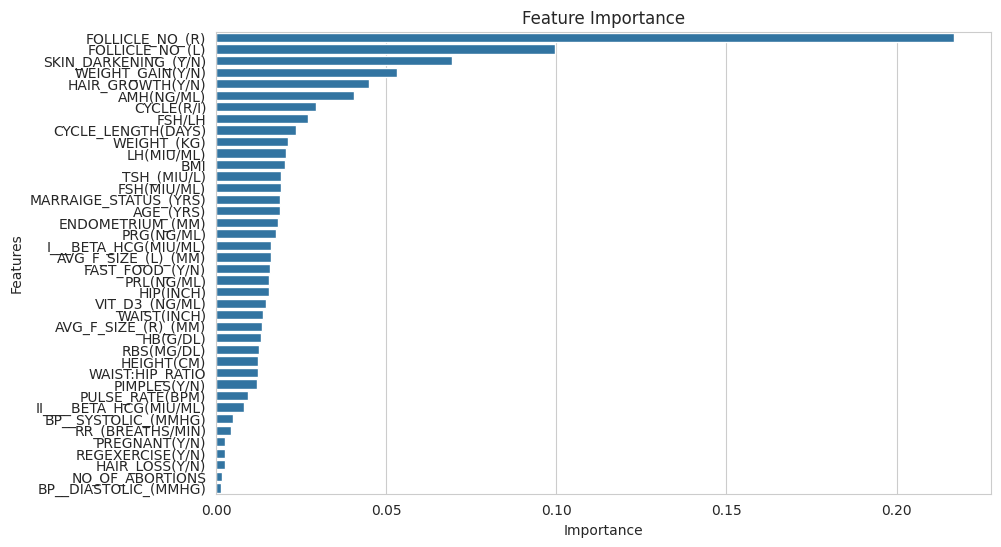

In [35]:
#feature importance
importances = rf.feature_importances_
features = x.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],           # number of trees
    'max_depth': [None, 5, 10, 20],            # tree depth
    'min_samples_split': [2, 5, 10],           # min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],             # min samples at a leaf node
    'bootstrap': [True, False]                 # whether bootstrap samples are used
}


# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)


# Fit the model
grid_search.fit(x_train_scaled, y_train)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [37]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best score from cross-validation
print("Best Cross-Validation Accuracy: {:.2f}".format(grid_search.best_score_))


Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.92


In [38]:
# Predict with the best estimator
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(x_test_scaled)

# Accuracy
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Test Set Accuracy (Tuned Model): {accuracy_best_rf:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)
print("Confusion Matrix:")
print(conf_matrix)


Test Set Accuracy (Tuned Model): 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        77
           1       0.82      0.72      0.77        32

    accuracy                           0.87       109
   macro avg       0.86      0.83      0.84       109
weighted avg       0.87      0.87      0.87       109

Confusion Matrix:
[[72  5]
 [ 9 23]]


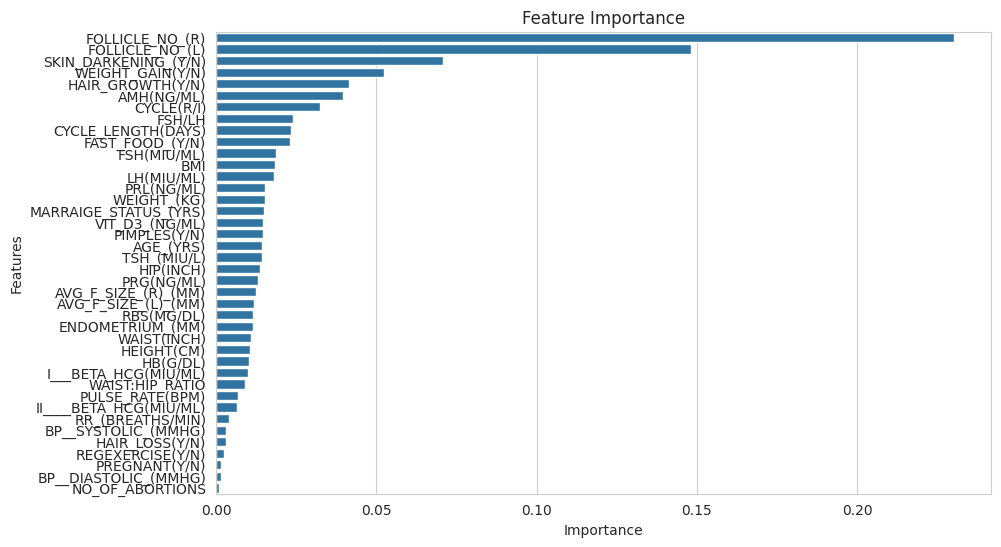

In [39]:
#feature importance
importances = best_rf.feature_importances_
features = x.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
#import pandas as pd
#from mlxtend.frequent_patterns import apriori, association_rules
#from mlxtend.preprocessing import TransactionEncoder

# Assuming comorbidities columns
#comorbidities = ['OBESITY', 'THYROID', 'DIABETES', 'PCOS_(Y/N)']  # Include PCOS for analysis

# Create a DataFrame with only comorbidity columns
#comorbidity_df = df[comorbidities]

# Convert to one-hot encoded format
#te = TransactionEncoder()
#te_ary = te.fit(comorbidity_df.values.tolist()).transform(comorbidity_df.values.tolist())
#comorbidity_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
#frequent_itemsets = apriori(comorbidity_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
#rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules to show relationships with PCOS
#pcos_rules = rules[rules['antecedents'].apply(lambda x: 'PCOS_(Y/N)' in list(x))]

# Display the rules
#print(pcos_rules)

KeyError: "['OBESITY', 'THYROID', 'DIABETES'] not in index"